##Enunciado
Con el comienzo del curso se van a lanzar unas ofertas de material escolar. Unos almacenes quieren ofrecer 600 cuadernos, 500 carpetas y 400 bolígrafos para la oferta, empaquetándolo de dos formas distintas: en el primer bloque pondrán 2 cuadernos, 1 carpeta y 2 bolígrafos; en el segundo, pondrán 3 cuadernos, 1 carpeta y 1 bolígrafo. Los precios de cada paquete serán de 6,5 euros y 7 euros, respectivamente.

Cuántos paquetes les conviene hacer de cada tipo para obtener los máximos beneficios?

###¿Cuál es el problema?
Tenemos que decidir cuántos paquetes de cada tipo fabricar para obtener el mayor beneficio económico posible, pero sin pasarnos del stock disponible de útiles.

###¿Qué información tenemos?
Tenemos una cantidad limitada de útiles escolares:

* 600 cuadernos
*500 carpetas
*400 bolígrafos

Queremos armar paquetes escolares de dos tipos:

* Tipo 1:	2 cuadernos	1 carpeta	2 boligrafos €6,5

* Tipo 2:	3 cuadernos	1 carpeta	1 boligrafo	 €7


###¿Cómo se puede solucionar?
Para resolver este problema usamos la programación lineal, que sirve para encontrar la mejor forma de usar los recursos disponibles.

En este caso, queremos ganar la mayor cantidad de plata posible vendiendo paquetes escolares, sin pasarnos del stock que tenemos. "(Maximizar)"



##Definir limites
* 2x +3y ≤600

La cantidad de cuadernos que uses entre los dos tipos de paquetes no puede pasar los 600

* x + y ≤500

No puedo usar más de 500 carpetas entre todos los paquetes.

* 2x + y ≤400

La suma de todos los bolígrafos usados tiene que ser como mucho 400

* x≥0 y y≥0

No negatividad

#¿Cómo se calcula la ganancia total?


𝑥 paquetes tipo 1

𝑦 paquetes tipo 2


Ganancia
=
6.5
×
𝑥
+
7
×
𝑦
Ganancia=6.5×x+7×y
(Eso significa: €6.5 por cada paquete tipo 1, más €7 por cada paquete tipo 2)



y ahora con usamos pulp para que pruebe todas las combinaciones sin pasarse de los recursos disponibles, hacerlo a mano llevaria horas o incluso dias.

In [ ]:
# Paso 1: Instalar PuLP (solo la primera vez)
!pip install pulp

# Paso 2: Importar la librería
import pulp

# Paso 3: Crear el problema de maximización
problema = pulp.LpProblem("Problema_Paquetes_Escolares", pulp.LpMaximize)

# Paso 4: Definir las variables de decisión
x = pulp.LpVariable('Paquetes_Tipo_1', lowBound=0, cat='Integer')  # cantidad de paquetes tipo 1
y = pulp.LpVariable('Paquetes_Tipo_2', lowBound=0, cat='Integer')  # cantidad de paquetes tipo 2

# Paso 5: Definir la función objetivo (ganancia a maximizar)
problema += 6.5 * x + 7 * y, "Ganancia_Total"

# Paso 6: Agregar las restricciones
problema += 2 * x + 3 * y <= 600, "Restriccion_Cuadernos"
problema += x + y <= 500, "Restriccion_Carpetas"
problema += 2 * x + y <= 400, "Restriccion_Bolígrafos"

# Paso 7: Resolver el problema
problema.solve()

# Paso 8: Mostrar resultados
if pulp.LpStatus[problema.status] == "Optimal":
    print("✅ Solución óptima encontrada:")
    print(f"📦 Paquetes tipo 1 a fabricar: {x.varValue}")
    print(f"📦 Paquetes tipo 2 a fabricar: {y.varValue}")
    print(f"💰 Ganancia total: €{pulp.value(problema.objective):.2f}")
else:
    print("❌ No se encontró una solución óptima.")

✅ Solución óptima encontrada:
📦 Paquetes tipo 1 a fabricar: 150.0
📦 Paquetes tipo 2 a fabricar: 100.0
💰 Ganancia total: €1675.00


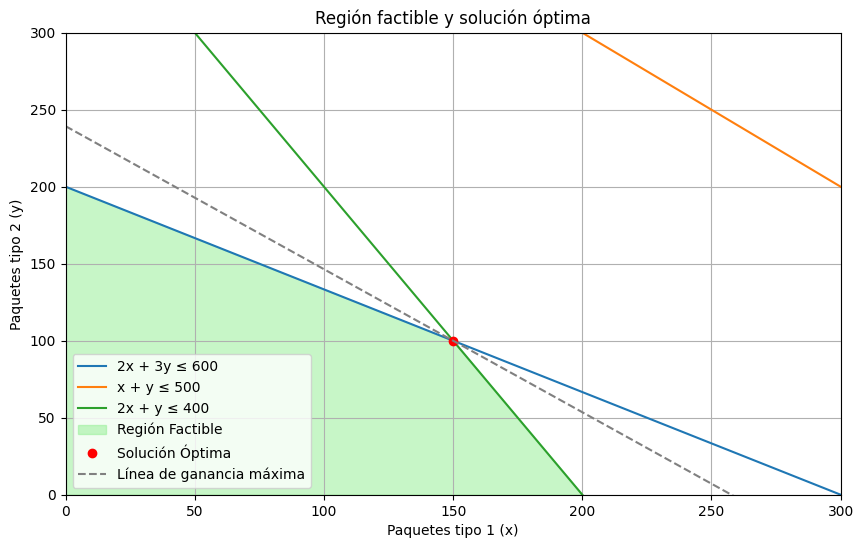

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crear rango de valores
x_vals = np.linspace(0, 300, 500)

# Dibujar cada restricción como línea
y1 = (600 - 2 * x_vals) / 3        # 2x + 3y <= 600 → y = (600 - 2x)/3
y2 = 500 - x_vals                  # x + y <= 500 → y = 500 - x
y3 = (400 - 2 * x_vals)            # 2x + y <= 400 → y = 400 - 2x

# Calcular la región factible (mínimo común)
y_min = np.minimum(np.minimum(y1, y2), y3)

# Crear gráfico
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y1, label='2x + 3y ≤ 600')
plt.plot(x_vals, y2, label='x + y ≤ 500')
plt.plot(x_vals, y3, label='2x + y ≤ 400')

# Rellenar la región factible
plt.fill_between(x_vals, 0, y_min, where=(y_min >= 0), color='lightgreen', alpha=0.5, label='Región Factible')

# Marcar la solución óptima
# Access x and y through the 'problema' object
x_opt = problema.variables()[0].varValue # Assuming x is the first variable
y_opt = problema.variables()[1].varValue # Assuming y is the second variable

plt.plot(x_opt, y_opt, 'ro', label='Solución Óptima')

# Opcional: Dibujar la línea de ganancia
# Por ejemplo: 6.5x + 7y = 1675 → y = (1675 - 6.5x)/7
ganancia_y = (pulp.value(problema.objective) - 6.5 * x_vals) / 7
plt.plot(x_vals, ganancia_y, '--', color='gray', label='Línea de ganancia máxima')

# Personalizar el gráfico
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.xlabel('Paquetes tipo 1 (x)')
plt.ylabel('Paquetes tipo 2 (y)')
plt.title('Región factible y solución óptima')
plt.legend()
plt.grid(True)
plt.show()

###Posibles mejoras
en la solución óptima solo se usan 250 carpetas (150 + 100), y tenés 500 disponibles, estás usando solo la mitad. comprar 250 ayudaria a utilizar la misma solucion optima pero ahorrando costos y espacio.




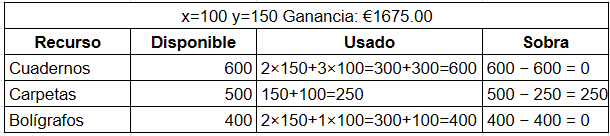

Otra modificacion podria ser aumentar el stock de boligrafos (+50), siendo que este es el mas limitado, aumentarlo permitiria crear mas paquetes del tipo 1 que son los que mas ganancia dan, aunque seguirian sobrando 238 carpetas que se podrian ahorrar.



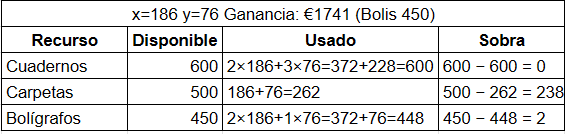

